# Métricas de Evaluación para la Regresión Lineal Simple

Una vez que hemos ajustado nuestro modelo de regresión lineal, es importante evaluar su rendimiento para entender qué tan bien está prediciendo los valores. Aquí describiremos algunas de las métricas más comunes usadas para evaluar modelos de regresión y cómo realizar pruebas de hipótesis para los parámetros del modelo.

## Coeficiente de Determinación ($R^2$)

El coeficiente de determinación, denotado como $R^2$, es una medida de cuán bien las predicciones del modelo se ajustan a los datos reales. En términos matemáticos, es la proporción de la variación total de la variable dependiente que es predecible a partir de la variable independiente.

$$ R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

donde:
- $y_i$ son los valores observados,
- $\hat{y}_i$ son los valores predichos por el modelo,
- $\bar{y}$ es el promedio de los valores observados.

### Cálculo sin Bibliotecas Específicas

```python
y_pred = [beta_0 + beta_1 * xi for xi in x]  # predicciones del modelo
ss_res = sum((yi - y_pred_i)**2 for yi, y_pred_i in zip(y, y_pred))
ss_tot = sum((yi - y_mean)**2 for yi in y)
r_squared = 1 - ss_res / ss_tot
print("Coeficiente de Determinación (R^2):", r_squared)
```

## Error Cuadrático Medio (MSE) y Raíz del Error Cuadrático Medio (RMSE)

El Error Cuadrático Medio (MSE) mide el promedio de los cuadrados de los errores, es decir, la diferencia cuadrática media entre los valores estimados y los valores reales.

$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

El RMSE es simplemente la raíz cuadrada del MSE, proporcionando una medida de error en las mismas unidades que la variable dependiente.

$$ RMSE = \sqrt{MSE} $$

### Cálculo sin Bibliotecas Específicas

```python
mse = sum((yi - y_pred_i)**2 for yi, y_pred_i in zip(y, y_pred)) / len(y)
rmse = mse ** 0.5
print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
```

## Pruebas de Hipótesis para los Coeficientes del Modelo

Las pruebas de hipótesis en la regresión lineal se utilizan para determinar si los coeficientes de la regresión son significativamente diferentes de cero, lo cual sugeriría que hay una relación significativa entre las variables independientes y dependientes. Se puede realizar una prueba t para cada coeficiente utilizando el estadístico t, que se calcula como:

$$ t = \frac{\beta}{SE(\beta)} $$

donde $SE(\beta)$ es el error estándar del coeficiente $\beta$.

### Cálculo sin Bibliotecas Específicas

```python
# Supongamos que ya tenemos SE_beta_1 y SE_beta_0 calculados
t_beta_1 = beta_1 / SE_beta_1
t_beta_0 = beta_0 / SE_beta_0
print("t-statistic for beta_1:", t_beta_1)
print("t-statistic for beta_0:", t_beta_0)
```

# Interpretación de Métricas en Regresión

## MSE (Error Cuadrático Medio)

### Definición
El MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia cuadrada media entre los valores observados y los valores predichos por el modelo.

### Interpretación
- Un **MSE de 0** indica un ajuste perfecto, ya que no hay diferencia entre los valores predichos y los observados.
- Valores mayores de MSE indican peores ajustes.
- El MSE puede ser difícil de interpretar directamente porque está en las unidades de la variable dependiente al cuadrado.

## RMSE (Raíz del Error Cuadrático Medio)

### Definición
El RMSE es la raíz cuadrada del MSE, proporcionando una medida de la magnitud del error.

### Interpretación
- Al igual que el MSE, un **RMSE de 0** indica un ajuste perfecto.
- El RMSE está en las mismas unidades que la variable dependiente, facilitando su interpretación en términos de magnitud del error.
- Un RMSE más bajo significa un mejor ajuste del modelo a los datos.
- Es útil para comparar errores de predicción entre diferentes modelos o conjuntos de datos.

## Prueba de Hipótesis para los Coeficientes del Modelo

### Definición
Esta prueba evalúa la hipótesis nula de que un coeficiente de regresión es igual a cero (no hay efecto) frente a la hipótesis alternativa de que el coeficiente no es cero (hay un efecto).

### Interpretación
- **Estadístico t**: Calculado como el coeficiente dividido por su error estándar. Un valor de t grande (positivo o negativo) sugiere la posibilidad de rechazar la hipótesis nula.
- **Valor-p**: Proporciona la probabilidad de observar un estadístico al menos tan extremo como el t observado, bajo la suposición de que la hipótesis nula es cierta. Un valor-p bajo (generalmente menor que 0.05) indica que es poco probable observar la relación por casualidad, por lo tanto, el coeficiente es estadísticamente significativo.

Estas métricas ofrecen una visión completa del rendimiento del modelo en términos de error y la significancia estadística de las relaciones modeladas, permitiendo realizar inferencias más robustas sobre los datos.

### Con sklearn


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [4]:
# Generar datos de ejemplo
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.randn(100, 1) * 0.5

# Dividir datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [5]:
# Ajustar Modelo de Regresión Lineal
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [12]:
# Predicciones y Métricas
beta_0 = model.intercept_
beta_1 = model.coef_[0]
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)



print(f"Intercepto (beta_0): {beta_0}")
print(f"Pendiente (beta_1): {beta_1}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")


Intercepto (beta_0): [2.10317009]
Pendiente (beta_1): [2.9902591]
MSE: 0.22943831174285728
RMSE: 0.4789971938778528
R²: 0.6521157503858556
MAE: 0.4007277417126668


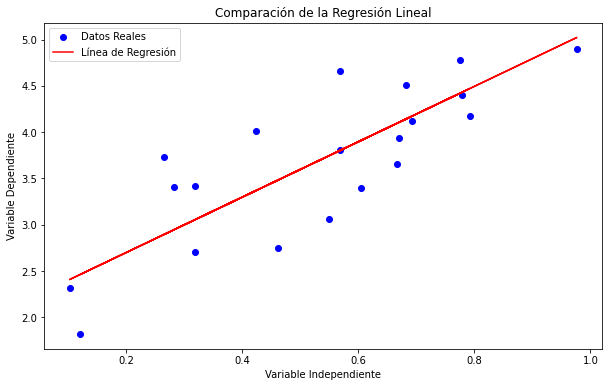

In [7]:
# Visualización de Resultados

plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Datos Reales')
plt.plot(x_test, y_pred, color='red', label='Línea de Regresión')
plt.title('Comparación de la Regresión Lineal')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.show()


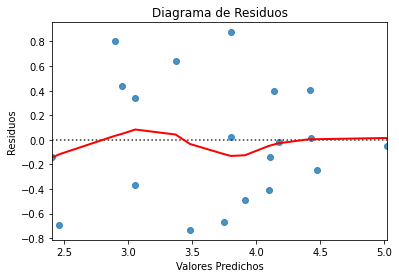

In [8]:
# Diagrama de Residuos

residuos = y_test - y_pred
sns.residplot(x=y_pred.flatten(), y=residuos.flatten(), lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Diagrama de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()


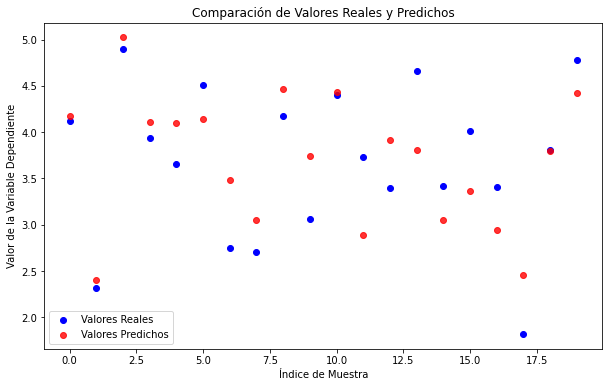

In [9]:
# Ajustar Modelo de Regresión Lineal
model = LinearRegression()
model.fit(x_train, y_train)

# Predicciones
y_pred = model.predict(x_test)

# Gráfica de comparación de valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores Reales')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Valores Predichos', alpha=0.8)
plt.title('Comparación de Valores Reales y Predichos')
plt.xlabel('Índice de Muestra')
plt.ylabel('Valor de la Variable Dependiente')
plt.legend()
plt.show()